In [168]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [169]:
os.chdir('C:/Users/avinash/Downloads')
data=pd.read_csv('train_ctrUa4K.csv')
data['Loan_Status'].value_counts(normalize=True)
print(data.shape)
data['Loan_Status']=data['Loan_Status'].map({"Y":1,"N":0})
data.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [170]:
np.corrcoef(data['Loan_Status'],data['Credit_History'])

array([[ 1., nan],
       [nan, nan]])

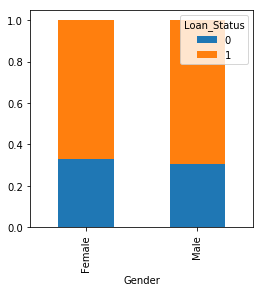

In [171]:
Gender=pd.crosstab(data['Gender'],data['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

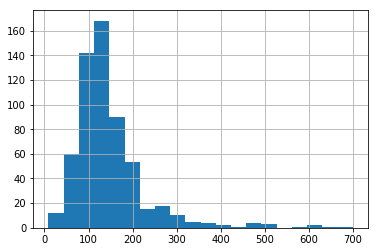

In [175]:
data['LoanAmount'].hist(bins=20)

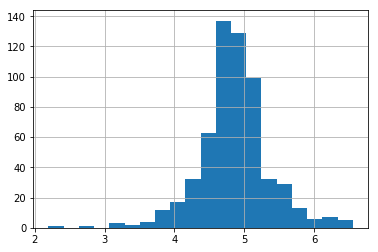

In [174]:
data['LoanAmount_log'] = np.log(data['LoanAmount']).hist(bins=20) 

In [124]:
y=data['Loan_Status']
data=data.drop(columns=['Loan_Status','Loan_ID'])

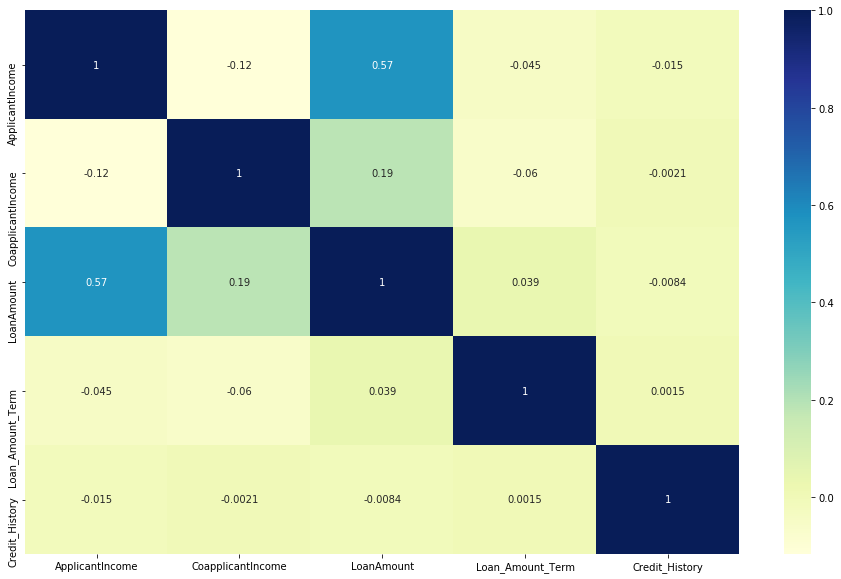

In [125]:
plt.figure(figsize=(16,10))

sns.heatmap(data.corr(),annot=True, cmap="YlGnBu")

In [53]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [126]:
na_df=pd.DataFrame({"Column_name":data.columns,
                     "Na_Count":data.isnull().sum(),
                     "Na_Percentage":data.isnull().sum()/data.shape[0]*100})
na_df
na_df.sort_values(by="Na_Percentage",ascending=False)

,Column_name,Na_Count,Na_Percentage
Credit_History,Credit_History,50,8.143322
Self_Employed,Self_Employed,32,5.211726
LoanAmount,LoanAmount,22,3.583062
Dependents,Dependents,15,2.442997
Loan_Amount_Term,Loan_Amount_Term,14,2.280130
Gender,Gender,13,2.117264
Married,Married,3,0.488599
Education,Education,0,0.000000
ApplicantIncome,ApplicantIncome,0,0.000000
CoapplicantIncome,CoapplicantIncome,0,0.000000


In [127]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,y,train_size=0.3,random_state=0)

In [128]:
num_cols=[col for col in X_train.columns if X_train[col].dtype=="int64" or X_train[col].dtype=="float64"]
num_cols

for ele in num_cols:
    X_train[ele]=X_train[ele].fillna(X_train[ele].mean())
    X_test[ele]=X_test[ele].fillna(X_train[ele].mean())

In [129]:
cat_cols=[col for col in X_train.columns if X_train[col].dtype=="object"]
cat_cols
for ele in cat_cols:
    X_train[ele]=X_train[ele].fillna(X_train[ele].mode()[0])#filling the missing values for categorical values using mode.
    X_test[ele]=X_test[ele].fillna(X_train[ele].mode()[0])    

In [35]:
#cols_to_drop=[col for col in data.columns if len(np.unique(data[col]==data[col].shape[0])) or len(np.unique(data[col]))==1]
#cols_to_drop

In [130]:
X_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [131]:
from sklearn.preprocessing import LabelEncoder

class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)

In [132]:
label_encoder=LabelEncoderExt()
for col in cat_cols:
        label_encoder.fit(X_train[col])
        X_train[col]=label_encoder.transform(X_train[col])
        X_test[col]=label_encoder.transform(X_test[col])
        
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
214,1,2,0,0,0,3173,3021.0,137.0,360.0,1.0000,3
565,1,2,0,1,0,4467,0.0,120.0,360.0,0.8375,0
204,1,2,2,1,0,3917,0.0,124.0,360.0,1.0000,1
234,1,2,1,0,0,3155,1779.0,140.0,360.0,1.0000,1
259,1,2,3,1,0,4931,0.0,128.0,360.0,0.8375,1


In [133]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler(feature_range=(0,1),copy=True)

for col in num_cols:
    X_train[col]=min_max.fit_transform(np.array(X_train[col]).reshape(-1,1))
    X_test[col]=min_max.transform(np.array(X_test[col]).reshape(-1,1))

In [134]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)

In [135]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,roc_curve

confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

array([[ 59,  70],
       [  4, 297]], dtype=int64)

In [136]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.827906976744186

In [137]:
precision=precision_score(y_test,y_pred)
precision


0.8092643051771117

In [138]:
recall=recall_score(y_test,y_pred)
recall

0.9867109634551495

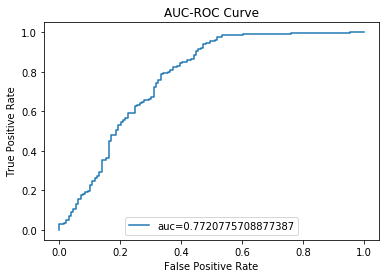

In [140]:
y_pred_proba=log_reg.predict_proba(X_test)[::,1]

fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc=8)
plt.show()


In [17]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3)
    

In [18]:
#def get_score(model,x_train,y_train,x_test,y_test):
   # model.fit(x_train,y_train)
  #  return model.score(x_test,y_test)

In [19]:
#for train_index,test_index in kf.split(data):
  #  x_train,x_test,y_train,y_test=data.index[train_index] ,data.index[test_index],
 #   data.traget[train_index],data.traget[test_index]

#print(get_score(LogisticRegression(),x_train,y_train,x_test,y_test))
                

In [145]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection  import GridSearchCV,RandomizedSearchCV
parmeter={"criterion":["entropy"],
          "max_depth":[5,6,7,8,9],
          "min_samples_split":[3,4,5,6,7],
          "min_samples_leaf":[1,2,3,4,5]}
tree=DecisionTreeClassifier(random_state=42)
tree

gd_cv=GridSearchCV(estimator=tree,param_grid=parmeter,cv=5)

gd_cv.fit(X_train,y_train)

print(gd_cv.best_params_)

print(gd_cv.best_score_)




{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 3}
0.7282608695652174


In [147]:
rd_cv=RandomizedSearchCV(estimator=tree,param_distributions=parmeter,cv=5, n_iter=10)

rd_cv.fit(X_train,y_train)

print(rd_cv.best_params_)

print(rd_cv.best_score_)

{'min_samples_split': 3, 'min_samples_leaf': 5, 'max_depth': 9, 'criterion': 'entropy'}
0.7119565217391305


In [148]:
tree=DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth=7,min_samples_split=3,min_samples_leaf=3)
tree.fit(X_train,y_train)
y_pred1=tree.predict(X_test)


In [149]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,roc_curve
confusion_matrix=confusion_matrix(y_test,y_pred1)
confusion_matrix


array([[ 75,  54],
       [ 57, 244]], dtype=int64)

In [150]:
recall=recall_score(y_test,y_pred1)
recall


0.8106312292358804

In [151]:
prec=precision_score(y_test,y_pred1)
prec

0.8187919463087249

In [152]:
accuracy=accuracy_score(y_test,y_pred1)
accuracy

0.7418604651162791

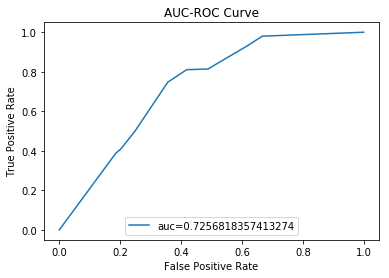

In [153]:
y_pred_proba_1=tree.predict_proba(X_test)[::,1]


fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba_1)

auc = roc_auc_score(y_test, y_pred_proba_1)

plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc=8)
plt.show()


In [155]:
fpr,tpr,thresholds
y_pred_proba_1=tree.predict_proba(X_test)[::,1]
y_pred_proba_1

array([0.67391304, 0.67391304, 0.67391304, 0.67391304, 1.        ,
       0.        , 1.        , 0.67391304, 0.        , 1.        ,
       1.        , 1.        , 0.67391304, 0.67391304, 0.67391304,
       0.69230769, 1.        , 0.25      , 0.25      , 0.        ,
       0.        , 0.66666667, 0.3       , 0.3       , 0.66666667,
       0.67391304, 0.69230769, 0.67391304, 0.        , 0.        ,
       0.67391304, 0.3       , 0.66666667, 0.3       , 0.67391304,
       0.        , 0.66666667, 0.75      , 0.67391304, 0.69230769,
       1.        , 0.        , 0.        , 0.67391304, 0.69230769,
       0.3       , 0.69230769, 0.67391304, 0.3       , 1.        ,
       1.        , 0.67391304, 0.66666667, 0.69230769, 0.        ,
       0.67391304, 1.        , 0.3       , 1.        , 0.3       ,
       0.        , 0.67391304, 1.        , 0.        , 0.67391304,
       0.67391304, 1.        , 0.75      , 1.        , 1.        ,
       0.75      , 0.66666667, 1.        , 1.        , 0.69230

In [156]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf
parameter={"bootstrap":True,
           "criterion":["entropy"],
           "max_depth":[10,11,12,13,14,15],
           "min_samples_split":[1,2,3,4,5],
           "min_samples_leaf":[5,6,7,8,9],
           "random_state":10}
parameter

{'bootstrap': True,
 'criterion': ['entropy'],
 'max_depth': [10, 11, 12, 13, 14, 15],
 'min_samples_split': [1, 2, 3, 4, 5],
 'min_samples_leaf': [5, 6, 7, 8, 9],
 'random_state': 10}

In [157]:
import warnings
rd_cv=RandomizedSearchCV(estimator=clf,param_distributions=parmeter,cv=5, n_iter=10)

rd_cv.fit(X_train,y_train)

print(rd_cv.best_params_)

print(rd_cv.best_score_)

{'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 7, 'criterion': 'entropy'}
0.7608695652173914


In [159]:
import warnings
warnings.filterwarnings('ignore')
gd_cv=GridSearchCV(estimator=clf,param_grid=parmeter,cv=5)

gd_cv.fit(X_train,y_train)

print(gd_cv.best_params_)
print(gd_cv.best_score_)


{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 7}
0.7608695652173914


In [160]:
clf=RandomForestClassifier(bootstrap=True,criterion='entropy',max_depth=5,min_samples_leaf=2,min_samples_split=6)
clf.fit(X_train,y_train)
y_pred2=clf.predict(X_test)

In [161]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,roc_curve

confusion_matrix=confusion_matrix(y_test,y_pred2)
confusion_matrix

array([[ 60,  69],
       [ 14, 287]], dtype=int64)

In [162]:
accuracy=accuracy_score(y_test,y_pred2)
accuracy

0.8069767441860465

In [163]:
precision=precision_score(y_test,y_pred2)
precision

0.8061797752808989

In [164]:
recall=recall_score(y_test,y_pred2)
recall

0.9534883720930233

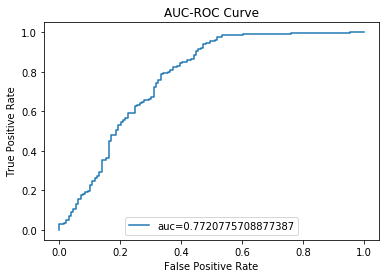

In [166]:
y_pred_proba2=clf.predict_proba(X_test)[::,1]

fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve')
plt.legend(loc=8)
plt.show()

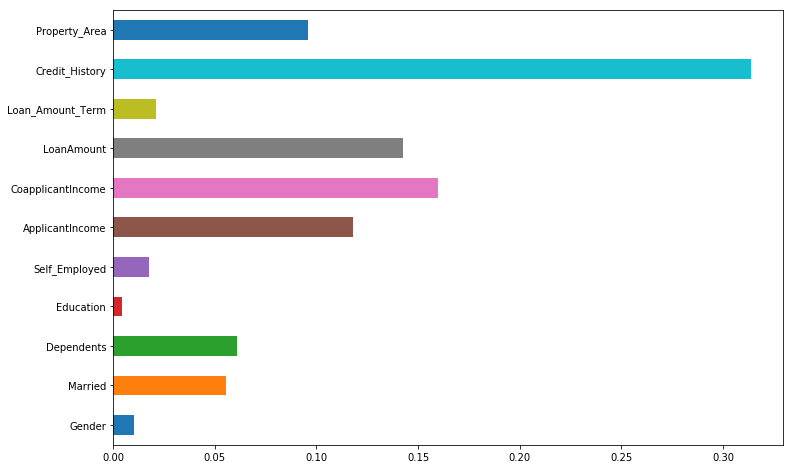

In [177]:
importances=pd.Series(clf.feature_importances_, index=X_train.columns)
importances.plot(kind='barh', figsize=(12,8))